<a href="https://colab.research.google.com/github/AhmedAtya74/Machine-Learning-Algorithms-From-Scratch/blob/main/Decision%20Tree/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from csv import reader
import pandas as pd

# Calculate the Gini index for a split dataset
### WHY?
*   Gini index operates on the categorical target variables.

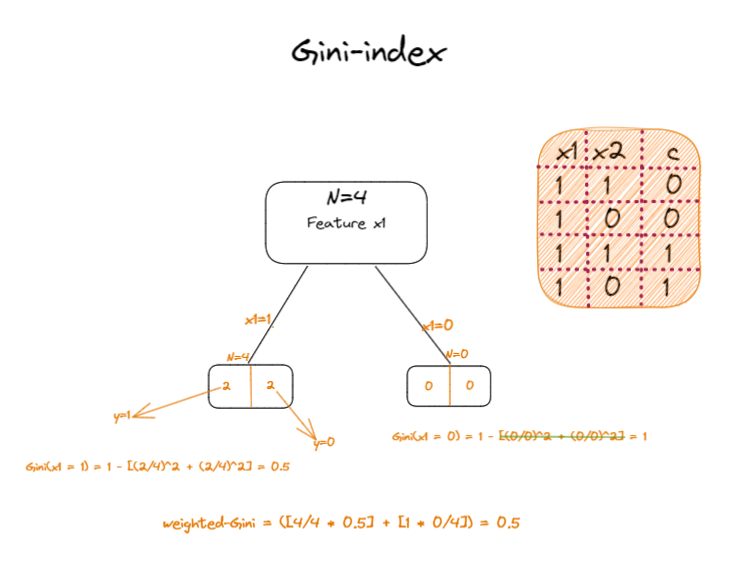


In [ ]:
def gini_index(subsets, classes):
    # count all samples at split point
    n_instances = int(sum([len(subset) for subset in subsets]))
    # sum weighted Gini index for each subset
    gini = 0.0
    for subset in subsets:
        size = int(len(subset))
        # avoid divide by zero
        if size == 0:
            continue
        score = 0.0
        # score the subset based on the score for each class
        for class_val in classes:
            p = [row[-1] for row in subset].count(class_val) / size
            score += p * p
        # weight the subset score by its relative size
        gini += (1.0 - score) * (size / n_instances)
    return gini

# Split a dataset based on an attribute and an attribute value.

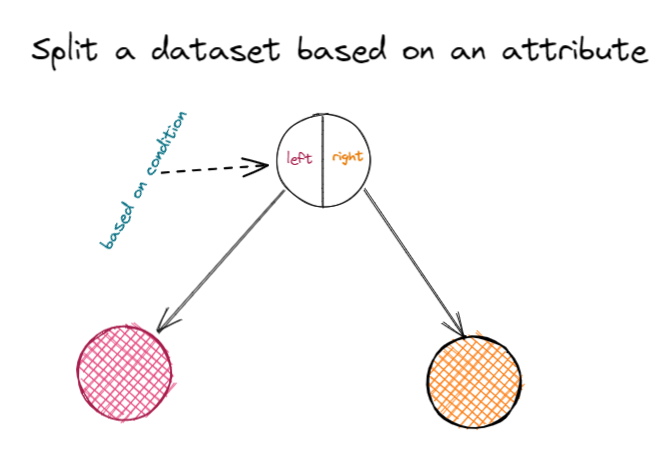

In [ ]:
def try_split(index, value, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right


# Select which Feature should split.

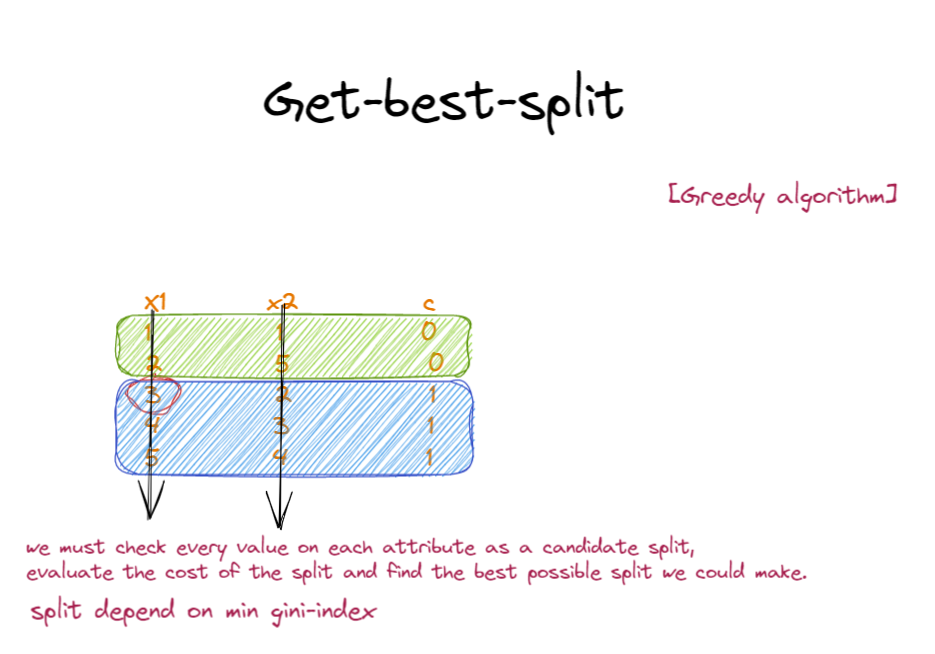

In [ ]:
def get_best_split(dataset):
    # Get all classes
    class_values = list(set(row[-1] for row in dataset))
    best_index, best_value, best_gini, best_subsets = 1e18, ' ', 1e18, None
    #  We must check every value on each attribute as a candidate split,
    #  evaluate the cost of the split and find the best possible split we could make.
    for index in range(len(dataset[0]) - 1):
        for row in dataset:
            subsets = try_split(index=index, value=row[index], dataset=dataset)
            gini = gini_index(subsets, class_values)
            if gini < best_gini:
                best_index, best_value, best_gini, best_subsets = index, row[index], gini, subsets
    return {'index': best_index, 'value': best_value, 'subsets': best_subsets}


 # Create a Leaf node value

In [ ]:
def leaf(subset):
    outcomes = [row[-1] for row in subset]
    return max(set(outcomes), key=outcomes.count)


# Create child splits for a node or make leaf.

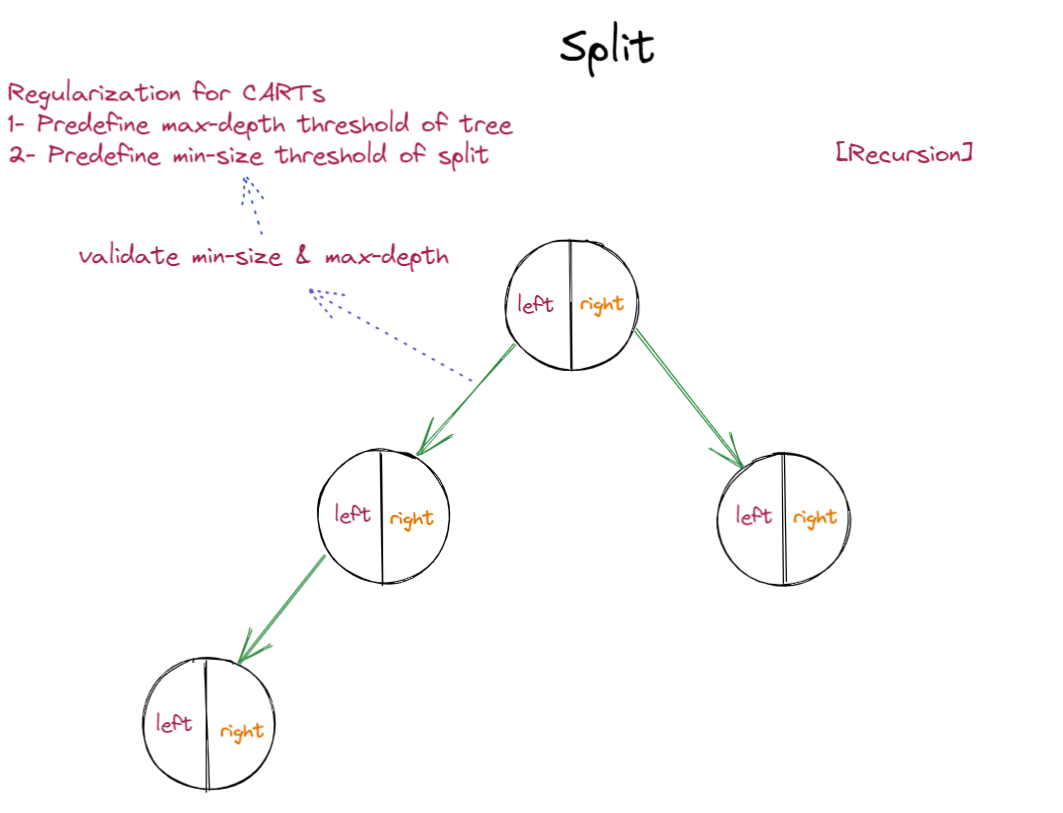


In [ ]:
def split(node, max_depth, min_size, depth):
    left, right = node['subsets']
    del (node['subsets'])
    # validate for a no split
    if not left or not right:
        node['left'] = node['right'] = leaf(left + right)
        return

    # validate for max depth
    if depth >= max_depth:
        node['left'], node['right'] = leaf(left), leaf(right)
        return
    # validate min_size & process left child
    if len(left) <= min_size:
        node['left'] = leaf(left)
    else:
        node['left'] = get_best_split(left)
        split(node['left'], max_depth, min_size, depth + 1)
    # validate min_size & process right child
    if len(right) <= min_size:
        node['right'] = leaf(right)

    else:
        node['right'] = get_best_split(right)
        split(node['right'], max_depth, min_size, depth + 1)


# Build a decision tree with Regularization 

*   Predefine max_depth threshold of tree
*   Predefine min_size threshold of split




In [ ]:
def build_tree(train, max_depth, min_size):
    root = get_best_split(train)
    split(node=root, max_depth=max_depth, min_size=min_size, depth=1)
    return root

# Make a prediction

In [ ]:
def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']



# Calculate the accuracy 


In [ ]:
def accuracy(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0


# Traingin Decision Tree Model

In [ ]:
def train(train_data, max_depth, min_size):
    tree = build_tree(train=train_data, max_depth=max_depth, min_size=min_size)
    return tree


# Testing Decision Tree Model

In [ ]:
def test(test_data, tree):
    predictions = list()
    for row in test_data:
        prediction = predict(tree, row)
        predictions.append(prediction)
    return predictions

# Load dataset

In [ ]:
def load_txt(path):
    file = open(path, "rt")
    lines = reader(file)
    dataset = list(lines)
    return dataset


# Processing data

## Set columns names

In [ ]:

names = ['Class Name', 'handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution',
         'physician-fee-freeze', 'el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban',
         'aid-to-nicaraguan-contras', 'mx-missile', 'immigration', 'synfuels-corporation-cutback',
         'education-spending', 'superfund-right-to-sue', 'crime', 'duty-free-exports',
         'export-administration-act-south-africa']

## Data Cleaning

In [ ]:
def processing_data(dataset):
    df = pd.DataFrame(dataset)
    df.columns = names
    for column in df:
        count_yes = len(df[df[column] == 'y'])
        count_no = len(df[df[column] == 'n'])
        value = 'n'
        if count_yes > count_no:
            value = 'y'
        df[column] = df[column].replace(['?'], value)
    for row in df.values:
        row[0], row[len(row) - 1] = row[len(row) - 1], row[0]
    return df.values


# Regularization


*   Max-depth
*   min-size



In [ ]:
max_depth = 25
min_size = 5

# Training & Testing Decision Tree Model

In [ ]:
path = '/content/sample_data/house-votes-84.data.txt'
dataset = load_txt(path=path)

dataset = processing_data(dataset=dataset)

n_instances = len(dataset)


train_len = [int(n_instances * 0.25), int(n_instances * 0.30), int(n_instances * 0.40), int(n_instances * 0.50),
             int(n_instances * 0.60), int(n_instances * 0.70)]

for length in train_len:
    train_data = dataset[0:length]
    test_data = dataset[length:n_instances]
    tree = train(train_data=train_data, max_depth=max_depth, min_size=min_size)
    predictions = test(test_data=test_data, tree=tree)
    actual = [row[-1] for row in test_data]
    print("Ratio=", (len(train_data) / n_instances) * 100, ':', (len(test_data) / n_instances) * 100)
    print('Actual=', actual)
    print('Predicted=', predictions)
    print('Accuracy=', accuracy(actual=actual, predicted=predictions))


Ratio= 24.82758620689655 : 75.17241379310344
Actual= ['democrat', 'democrat', 'democrat', 'republican', 'democrat', 'republican', 'democrat', 'democrat', 'democrat', 'republican', 'democrat', 'republican', 'republican', 'republican', 'republican', 'republican', 'democrat', 'republican', 'republican', 'democrat', 'democrat', 'democrat', 'democrat', 'democrat', 'republican', 'republican', 'republican', 'republican', 'republican', 'democrat', 'democrat', 'democrat', 'republican', 'republican', 'republican', 'democrat', 'democrat', 'democrat', 'republican', 'democrat', 'republican', 'democrat', 'republican', 'democrat', 'democrat', 'democrat', 'republican', 'republican', 'republican', 'democrat', 'republican', 'democrat', 'democrat', 'democrat', 'democrat', 'republican', 'democrat', 'democrat', 'republican', 'republican', 'democrat', 'democrat', 'democrat', 'republican', 'democrat', 'democrat', 'democrat', 'democrat', 'republican', 'democrat', 'democrat', 'democrat', 'democrat', 'democrat'